In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

In [51]:
df = pd.read_csv("titanic.csv")

# Purpose of Model :- Given the Features we need to predict if Passenger will survived or Not-Survived.

# EDA :- 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

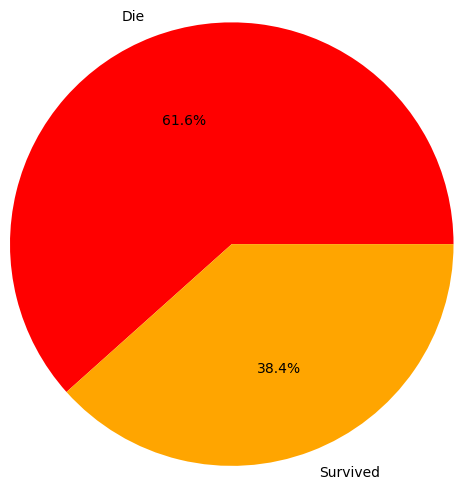

In [6]:
plt.pie(df["Survived"].value_counts(),labels=["Die","Survived"],colors=["red","orange"],autopct="%1.1f%%",radius=1.5)
plt.show()

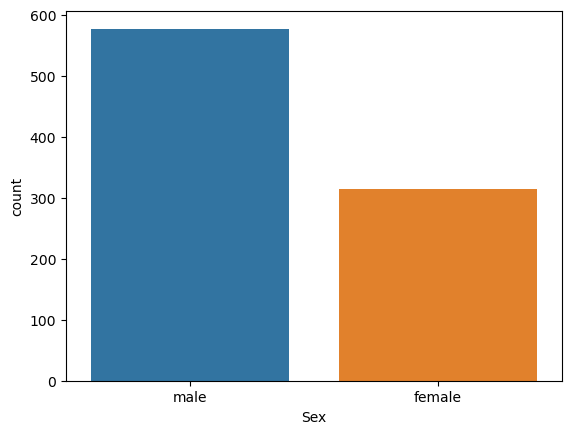

In [7]:
sns.countplot(data=df,x="Sex")
plt.show()

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


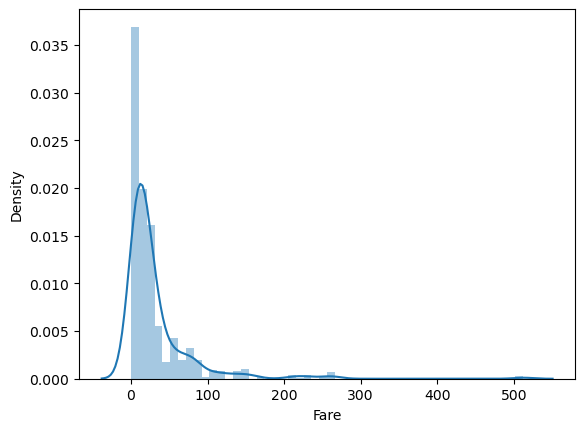

In [9]:
sns.distplot(df["Fare"])
plt.show()

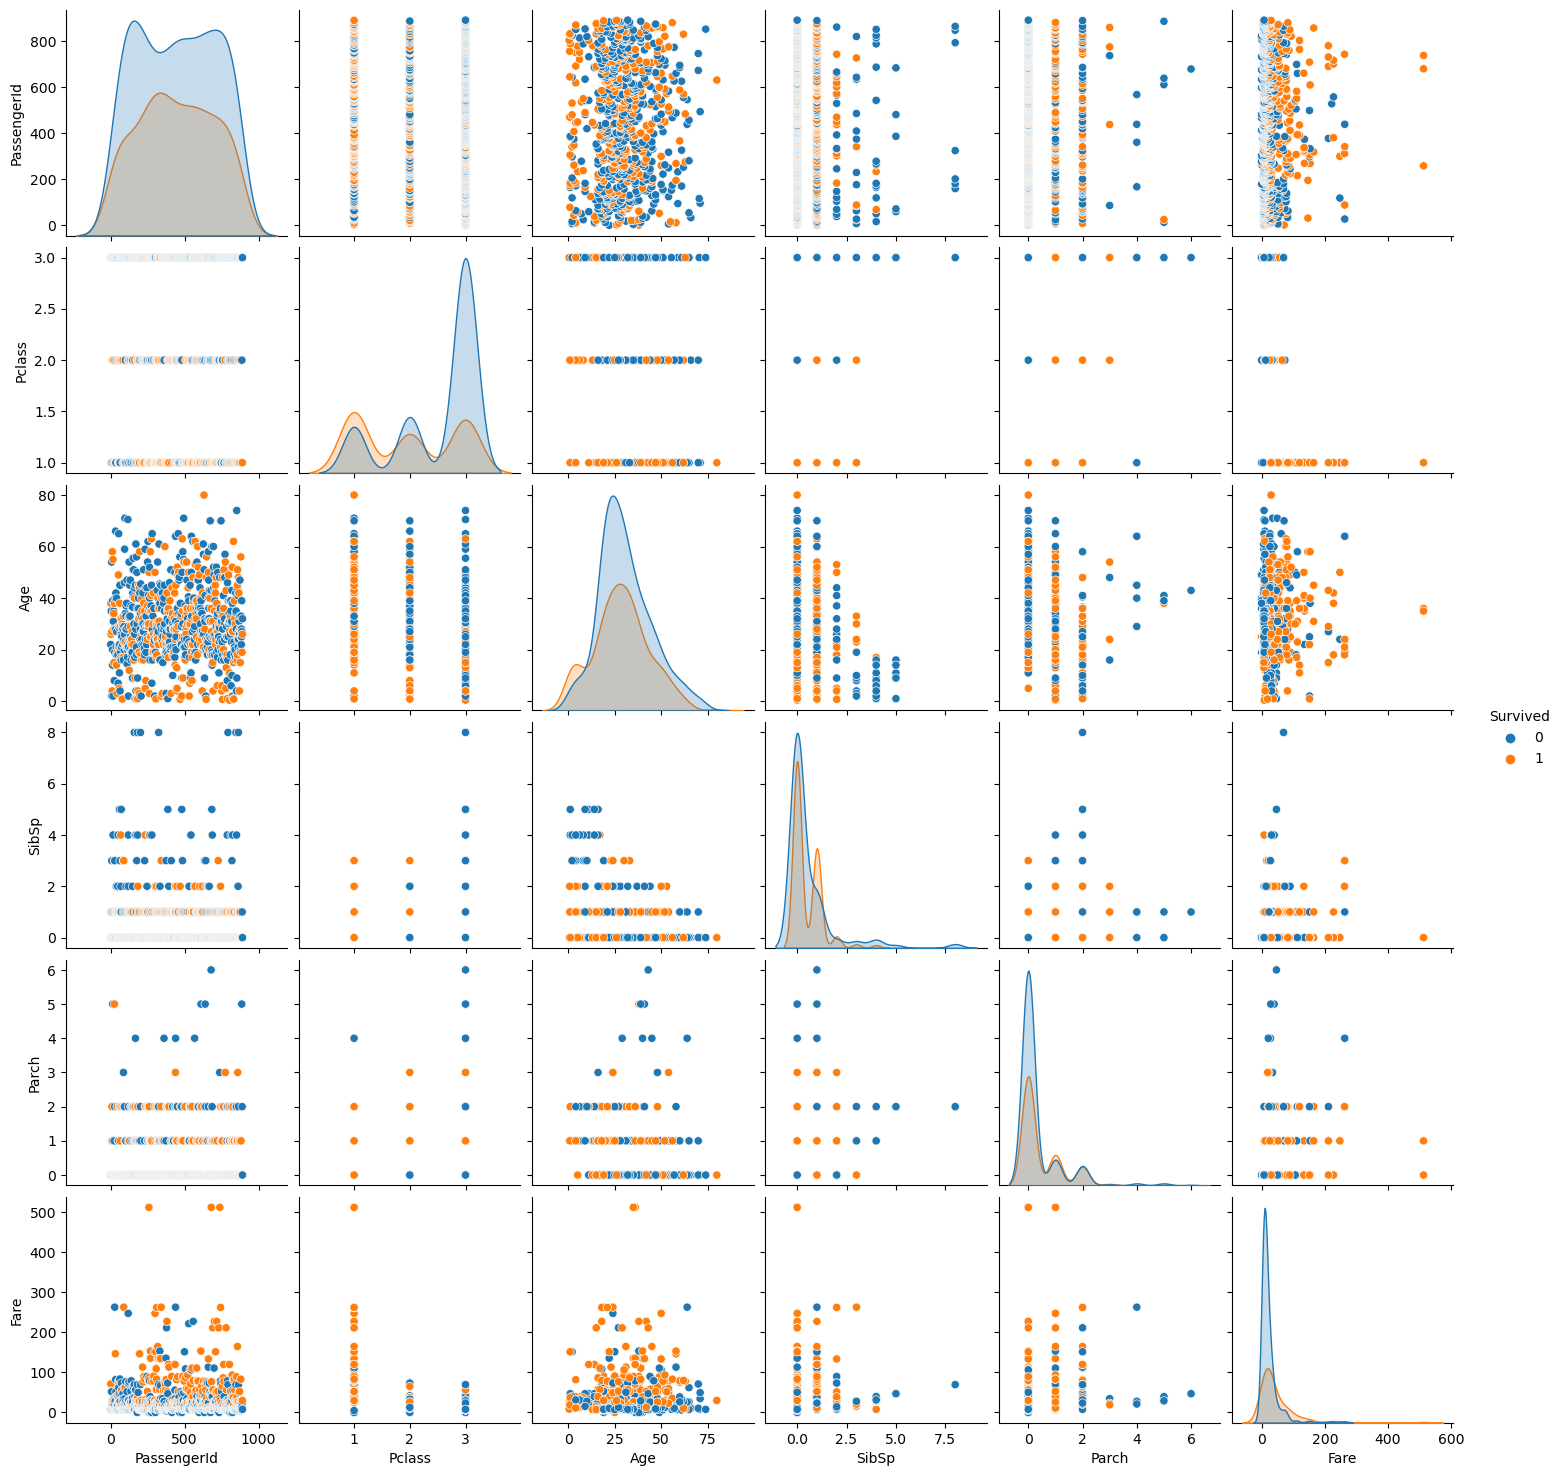

In [10]:
sns.pairplot(df,hue="Survived")
plt.show()

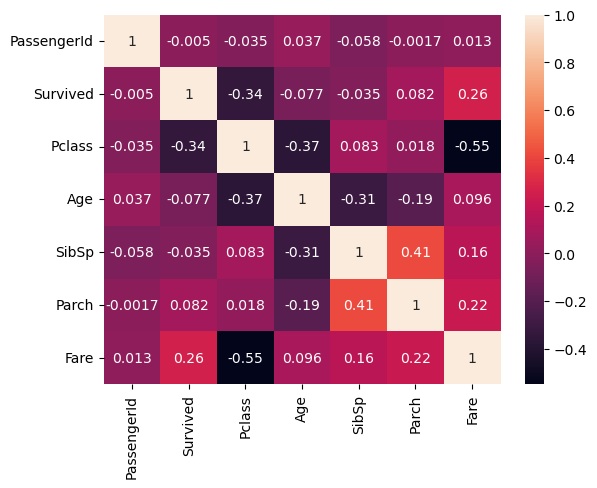

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Cleaning and Preprocessing :- 

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

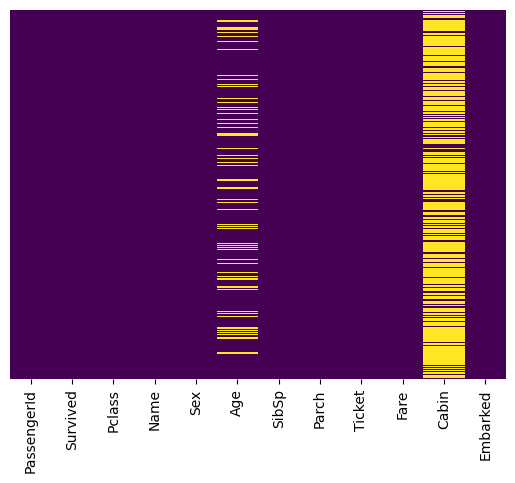

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
plt.show()

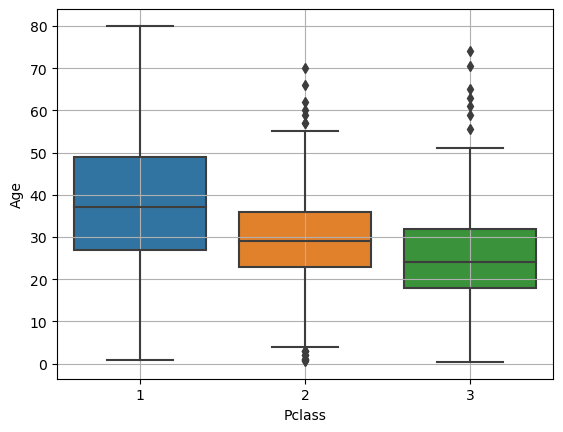

In [55]:
sns.boxplot(x="Pclass",y="Age",data=df)
plt.grid()

In [56]:
def fillage(col):
    
    age = col[0]
    pclass = col[1]
    
    if(pd.isnull(age)):
        if(pclass==1):
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [57]:
df["Age"] = df[["Age","Pclass"]].apply(fillage,axis=1)

In [58]:
df.drop("Cabin",axis=1,inplace=True)

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

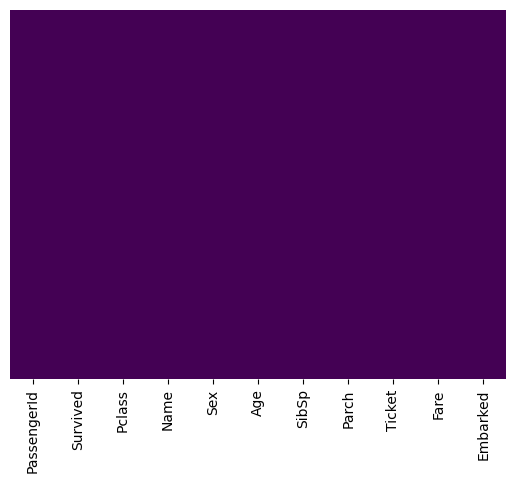

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
plt.show()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Data Preprocessing :- 

In [61]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [25]:
x.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [26]:
x.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
oe = OrdinalEncoder()

x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,25.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [29]:
x.Sex.value_counts()

1.0    577
0.0    312
Name: Sex, dtype: int64

In [30]:
x.Embarked.value_counts()

2.0    644
0.0    168
1.0     77
Name: Embarked, dtype: int64

# Model Building :- 

In [62]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(xtrain,ytrain)

ypred = logreg.predict(xtest)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)

print(f"Accuracy:- {ac}\n{cm}\n{cr}")

Accuracy:- 0.8052434456928839
[[141  24]
 [ 28  74]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [64]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Score :- {train}\nTesting Score :- {test}")

Training Score :- 0.8038585209003215
Testing Score :- 0.8052434456928839


# ForeCasting New Obsevartion :- 

In [65]:
oe

OrdinalEncoder()

In [66]:
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [67]:
s = "male"
e = "Q"

In [68]:
oe.transform([[s,e]])

array([[1., 1.]])

In [69]:
pclass =1
sex="male"
age=24
sibsp=0
parch=1
fare=34
embarked="S"

newob = [pclass,sex,age,sibsp,parch,fare,embarked]
newob[1]
newob[-1]

'S'

In [70]:
oe.transform([[newob[1],newob[-1]]])[0]

array([1., 2.])

In [71]:
newob[1],newob[-1]=oe.transform([[newob[1],newob[-1]]])[0]

In [72]:
newob

[1, 1.0, 24, 0, 1, 34, 2.0]

In [73]:
logreg.predict([newob])

array([1], dtype=int64)

In [74]:
def predictsurvived():
    pclass = int(input("Enter Passenger Class :- "))
    sex = input("Enter Gender of the passenger :- ")
    age = float(input("Enter the Age of passenger :- "))
    sibsp = int(input("Enter no of Sibsp of the Passenger :- "))
    parch = int(input("Enter no of parch of the passenger :- "))
    fare = int(input("Enter Ticket Price :- "))
    embarked = input("Enter Embarked/Port of the Passenger:- ")
    
    newob = [pclass,sex,age,sibsp,parch,fare,embarked]
    newob[1],newob[-1]=oe.transform([[newob[1],newob[-1]]])[0]
    
    v = logreg.predict([newob])[0]
    
    if v == 1:
        print(f"\n With the Given Feature the passenger will Survived")
        return v
    else:
        print(f"\n With the Given Feature the passenger will Not Survived")
        return v

In [76]:
predictsurvived()


Enter Passenger Class :- 1
Enter Gender of the passenger :- male
Enter the Age of passenger :- 30
Enter no of Sibsp of the Passenger :- 0
Enter no of parch of the passenger :- 0
Enter Ticket Price :- 300
Enter Embarked/Port of the Passenger:- Q

 With the Given Feature the passenger will Not Survived


0